# Hotel Reservations
Para este proyecto se utilizara el siguiente dataset: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset, el cual contiene datos sobre los distintos tipos de reservas de un hotel y si sus huéspedes asistieron a la misma o la cancelaron.


### Objetivos:
- Analizar cada variable de manera individual para **describir y visualizar** las frecuencias de las mismas.
- Hacer un análisis **explorando** la relación entre la variable 'bookig_status' (el estado de la reserva) y el resto de variables.
- Hacer un **escalado de datos y un balanceo de clases** para normalizar y equilibrar los valores de algunas variables.
- Intentar **predecir** si futuros clientes cancelaran o no su reserva, a partir del entrenamiento de un modelo de Machine Learning.

<br>

**Variables del dataset:**

1. "Booking_ID": unique identifier of each booking <br>
2. "no_of_adults": Number of adults <br>
3. "no_of_children": Number of Children <br>
4. "no_of_weekend_nights": Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel <br>
5. "no_of_week_nights": Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel <br>
6. "type_of_meal_plan": Type of meal plan booked by the customer <br>
7. "required_car_parking_space": Does the customer require a car parking space? (0 - No, 1- Yes) <br>
8. "room_type_reserved": Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels. <br>
9. "lead_time": Number of days between the date of booking and the arrival date <br>
10. "arrival_year": Year of arrival date <br>
11. "arrival_month": Month of arrival date
12. "arrival_date": Date of the month <br>
13. "market_segment_type": Market segment designation. <br>
14. "repeated_guest": Is the customer a repeated guest? (0 - No, 1- Yes) <br>
15. "no_of_previous_cancellations": Number of previous bookings that were canceled by the customer prior to the current booking <br>
16. "no_of_previous_bookings_not_canceled": Number of previous bookings not canceled by the customer prior to the current booking <br>
17. "avg_price_per_room": Average price per day of the reservation; prices of the rooms are dynamic. (in euros) <br>
18. "no_of_special_requests": Total number of special requests made by the customer (e.g. high floor, view from the room, etc) <br>
19. "booking_status": Flag indicating if the booking was canceled or not. <br>





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel-reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# **Desbalanceo de Clases**

## Convierto variables categóricas a númericas 

In [3]:
data = df.copy(deep=True)

In [4]:
#cambio valores
data['arrival_year'] = [ 0 if x == '2017' else 1 for x in data['arrival_year'] ]

#mapeo con un diccionario
dic = {'Not_Canceled':0, 'Canceled':1}
data['booking_status'] = data['booking_status'].map(dic)


#creo variables dummies
dummy_type_meal = pd.get_dummies(data['type_of_meal_plan'], prefix='type_meal')
dummy_room_type = pd.get_dummies(data['room_type_reserved'], prefix='reserved')
dummy_market_type = pd.get_dummies(data['market_segment_type'], prefix='market_segment')

#concateno todo en un mismo dataframe
data = pd.concat([data, dummy_type_meal, dummy_room_type,dummy_market_type], axis=1)

#elimino columnas repetidas o innecesarias
to_drop = ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',  'market_segment_type']
data.drop(to_drop,axis=1, inplace=True)

In [5]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,reserved_Room_Type 3,reserved_Room_Type 4,reserved_Room_Type 5,reserved_Room_Type 6,reserved_Room_Type 7,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Offline,market_segment_Online
0,2,0,1,2,0,224,1,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,1,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,1,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,1,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,1,4,11,0,...,0,0,0,0,0,0,0,0,0,1


## Escalado de datos de variables numéricas
- Se transforman los datos de las columnas con valores superiores a 1 en un valor en un rango entre [0, 1].

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
to_scale = ['no_of_adults','no_of_children',
             'no_of_weekend_nights','no_of_week_nights', 
             'no_of_special_requests','no_of_previous_cancellations',
             'no_of_previous_bookings_not_canceled', 'lead_time', 
             'arrival_month', 'arrival_date', 'avg_price_per_room']

mms = MinMaxScaler()
data_scaled = mms.fit_transform(data[to_scale])

In [8]:
data_scaled = pd.DataFrame(data_scaled, columns = to_scale)

In [9]:
for col in data_scaled:
    data[col] = data_scaled[col]

In [10]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,reserved_Room_Type 3,reserved_Room_Type 4,reserved_Room_Type 5,reserved_Room_Type 6,reserved_Room_Type 7,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Offline,market_segment_Online
0,0.50,0.0,0.142857,0.117647,0,0.505643,1,0.818182,0.033333,0,...,0,0,0,0,0,0,0,0,1,0
1,0.50,0.0,0.285714,0.176471,0,0.011287,1,0.909091,0.166667,0,...,0,0,0,0,0,0,0,0,0,1
2,0.25,0.0,0.285714,0.058824,0,0.002257,1,0.090909,0.900000,0,...,0,0,0,0,0,0,0,0,0,1
3,0.50,0.0,0.000000,0.117647,0,0.476298,1,0.363636,0.633333,0,...,0,0,0,0,0,0,0,0,0,1
4,0.50,0.0,0.142857,0.058824,0,0.108352,1,0.272727,0.333333,0,...,0,0,0,0,0,0,0,0,0,1


## Balanceo de clases con SMOTE

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
X = data.drop('booking_status', axis =1)
y = data['booking_status']

sm = SMOTE(random_state=0)

X_sm, y_sm = sm.fit_resample(X,y)


print('\n' 'Valor de X antes de SMOTE: ', X.shape, '\n' 'Valor de X después de SMOTE: ', X_sm.shape,
       '\n' '------------------------------' '\n'
      'Balance de clases de la variable ''y_sm (%) ' '\n' , y_sm.value_counts(normalize=True)*100)


Valor de X antes de SMOTE:  (36275, 30) 
Valor de X después de SMOTE:  (48780, 30) 
------------------------------
Balance de clases de la variable y_sm (%) 
 0    50.0
1    50.0
Name: booking_status, dtype: float64


## Divido los datos en un grupo para entrenarlos y en un grupo para probarlos

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)

### Tamaños del los nuevos dataset

In [15]:
print('Tamaño del dataset X_train: ', X_train.shape, '\n' 'Tamaño del dataset X_test: ', X_test.shape)

Tamaño del dataset X_train:  (39024, 30) 
Tamaño del dataset X_test:  (9756, 30)


In [16]:
print('Tamaño del dataset y_train: ', y_train.shape, '\n' 'Tamaño del dataset y_test: ', y_test.shape)

Tamaño del dataset y_train:  (39024,) 
Tamaño del dataset y_test:  (9756,)


# Aprendizaje supervisado

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [29]:
#Entrenamiento/Train con Arbol de Decision
modeloAD = tree.DecisionTreeClassifier(max_depth=20, random_state=0)
modeloAD.fit(X_train, y_train)
y_predAD = modeloAD.predict(X_test)

#Entrenamiento/Train con Bosque Aleatorio
modeloBA = RandomForestClassifier(random_state=0)
modeloBA.fit(X_train, y_train)
y_predBA = modeloBA.predict(X_test)


****** #Evaluacion Arbol de Decisión******
Accuracy:  0.8838663386633866 
 Recall:  0.8715015321756895 

Matriz de Confusión:  
 [[4357  504]
 [ 629 4266]] 



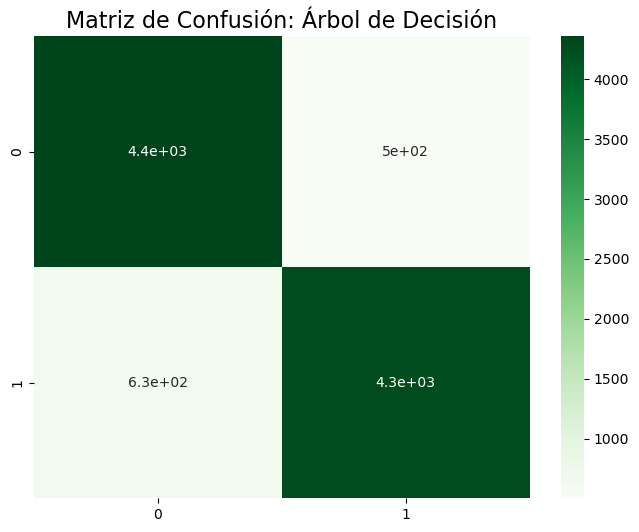

In [30]:
#Evaluacion/Test de Arbol de Decision
print('\n''****** Evaluacion Arbol de Decisión******')
print('Accuracy: ', accuracy_score(y_test, y_predAD), '\n', 'Recall: ', recall_score(y_test, y_predAD), '\n')
print('Matriz de Confusión:  \n', confusion_matrix(y_test, y_predAD) , '\n')

cm = confusion_matrix(y_test, y_predAD)
plt.figure(figsize=(8, 6))
plt.title('Matriz de Confusión: Árbol de Decisión', size=16)
sns.heatmap(cm, annot=True, cmap='Greens');


******Evaluación Bosque Aleatorio******
Accuracy:  0.9228167281672817 
 Recall:  0.9131767109295199 

Matriz de Confusión:  
 [[4533  328]
 [ 425 4470]]


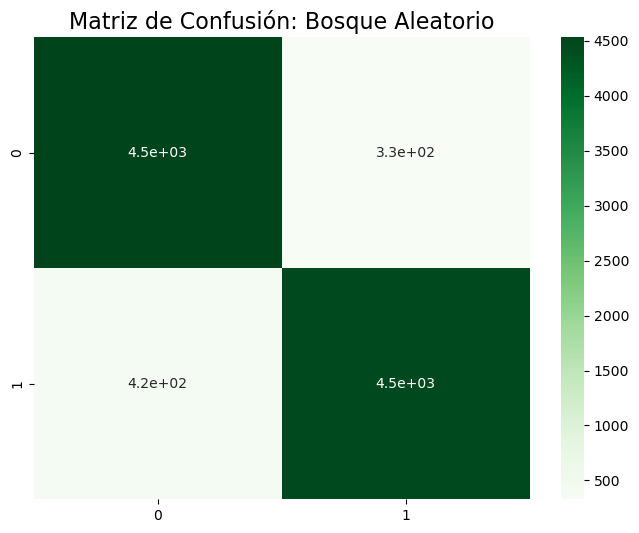

In [28]:
#Evaluacion/Test de Bosque Aleatorio
print('\n''******Evaluación Bosque Aleatorio******')
print('Accuracy: ', accuracy_score(y_test, y_predBA), '\n', 'Recall: ', recall_score(y_test, y_predBA), '\n')
print('Matriz de Confusión:  \n', confusion_matrix(y_test, y_predBA))

cm = confusion_matrix(y_test, y_predBA)
plt.figure(figsize=(8, 6))
plt.title('Matriz de Confusión: Bosque Aleatorio', size=16)
sns.heatmap(cm, annot=True, cmap='Greens');